# Fig 1
This is a iPython Notebook document, associated to the Fig 1 figure in the Support Information of the manuscript:
# PALMA, an improved algorithm for the DOSY signal processing
Afef cherni, Émilie chouzenoux, Marc-André Delsuc 

# a)

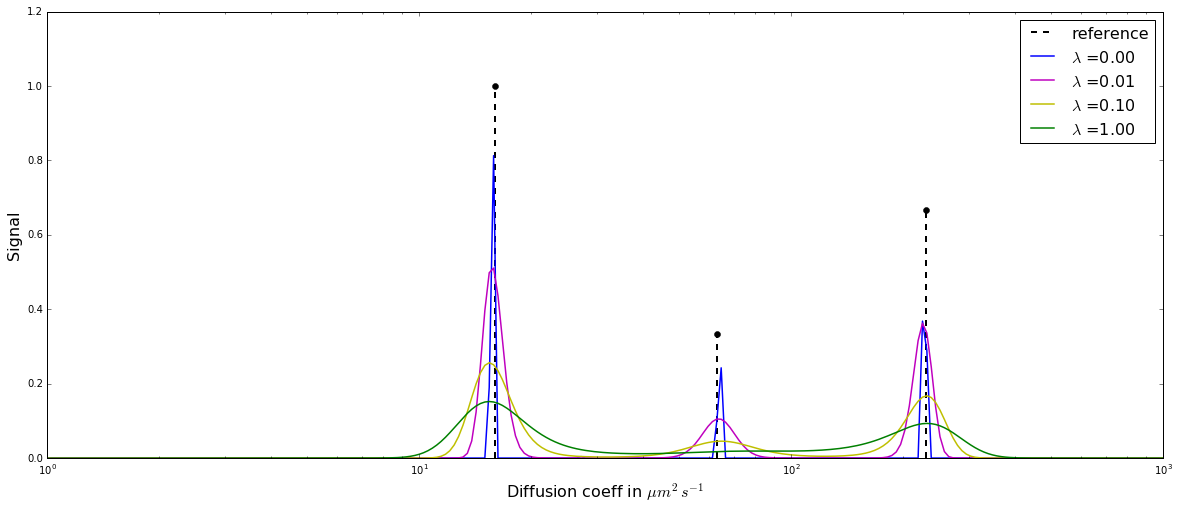

In [2]:
import numpy as np
import scipy.stats
import scipy
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
%matplotlib inline
import scene
import PALMA
import pandas as pd
##############################
# Parametres
##############################
N = 256
M = 64
delta = 2E-3
Delta = 50E-3
Dmin = 1.0
Dmax = 1000.0
D= 16
noise = 0.001 #noise = 0.1%
##############################
# Mesure
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_exp(D, Delta, invshift=10)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
x = scene.scene_Kazi(N, Dmin, Dmax)
x = x.reshape((N,1))
z = np.dot(K,x) 
sigma = noise*z[0]
np.random.seed(3333)
y = z + sigma*np.random.randn(M,1)
eta = 1.01*np.sqrt(M)*sigma
##############################
# Algo param
##############################
nbiter = 200000
prec = 1E-14
full_output = False
######################## 
# Reconstruction
######################## 
x_n1, criters = PALMA.PPXAplus(K, Binv, y, eta, nbiter=nbiter, lamda=0, prec=prec)
x_n2, criters = PALMA.PPXAplus(K, Binv, y, eta, nbiter=nbiter, lamda=0.1, prec=prec)
x_n3, criters = PALMA.PPXAplus(K, Binv, y, eta, nbiter=nbiter, lamda=0.01, prec=prec)
x_n4, criters = PALMA.PPXAplus(K, Binv, y, eta, nbiter=nbiter, lamda=1, prec=prec)
##############################
# Graphe
##############################
plt.figure(figsize=(20,8))
#Plot of Reference Peak
plt.plot([16,16],[0,1],'k--', linewidth = 2, label = "reference")
plt.plot(16,1, 'ko')
plt.plot([63,63],[0,1./3],'k--', linewidth = 2)
plt.plot(63, 1./3, 'ko')
plt.plot([230,230],[0,2./3],'k--', linewidth = 2)
plt.plot(230, 2./3, 'ko')
#Plot of recovered signal
plt.semilogx(Lap_axis,x_n1, "b", linewidth = 1.5, label= r"$\lambda$ =%0.2f" % 0.00 )
plt.semilogx(Lap_axis,3*x_n3, "m", linewidth = 1.5, label= r"$\lambda$ =%0.2f" % 0.01)
plt.semilogx(Lap_axis,3*x_n2, "y", linewidth = 1.5, label= r"$\lambda$ =%0.2f" % 0.1)
plt.semilogx(Lap_axis,3*x_n4, "g", linewidth = 1.5, label= r"$\lambda$ =%0.2f" % 1.00)
#Axis+legend
plt.ylim(0, 1.2)
plt.ylabel("Signal", size=16)
plt.xlabel("Diffusion coeff in $\mu m^2 \, s^{-1}$", size=16)
plt.legend(loc=1, fontsize=16)
#plt.savefig('Fig1.eps', format='eps', dpi=1000)

# b)

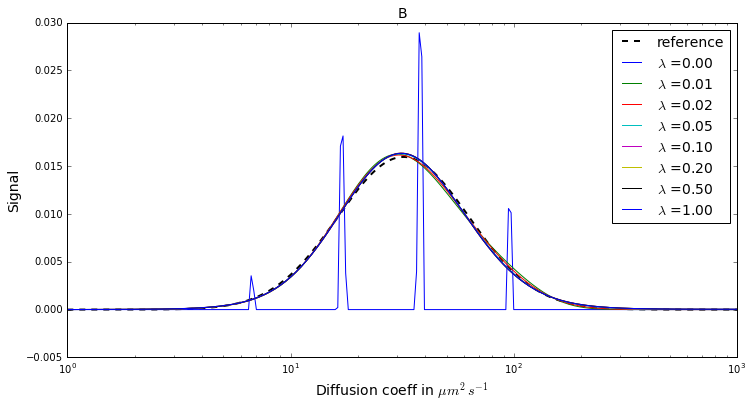

In [1]:
import numpy as np
import scipy.stats
import scipy
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
%matplotlib inline
import scene
import PALMA
import pandas as pd
##############################
#Measurement parameter
##############################
N = 256
M = 64
delta = 2E-3
Delta = 50E-3
Dmin = 1.0
Dmax = 1000.0
D= 16
noise = 0.001 #noise = 0.1%
##############################
#Measurement of signal B
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_exp(D, Delta, invshift=10)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
x = scene.scene_Gauss(N)
x = x.reshape((N,1))
z = np.dot(K,x) 
sigma = noise*z[0]
np.random.seed(1234)
y = z + sigma*np.random.randn(M,1)
eta = 1.01*np.sqrt(M)*sigma
##############################
#Algorithm parameter
##############################
nbiter = 200000
prec = 1E-14
full_output = False
##############################
#Signal reconstruction
##############################
LamdaList = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
plt.figure(figsize=(12,6))
plt.semilogx(Lap_axis,np.abs(x), "k--", linewidth = 2, label = "reference")
coeff = 8
for lamda in LamdaList:
    #Reconstruction of the signal
    x_n, criters = PALMA.PPXAplus(K, Binv, y, eta, nbiter, lamda, prec, full_output)
    #Plot of recovered signal
    plt.semilogx(Lap_axis,x_n/coeff, "-", linewidth = 1, label = r"$\lambda$ =%.2f" % lamda)
    plt.legend(loc=1, fontsize=14)
    plt.ylabel("Signal", size=14)
    plt.xlabel("Diffusion coeff in $\mu m^2 \, s^{-1}$", size=14)
    plt.ylim(ymin=-0.005,ymax=0.03)
    plt.title("B", fontsize=14)
    coeff = 1
plt.show()